In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = zp.shape[0]

$$ b = \frac{n\sum_{i=1}^{n}{x_iy_i} - (\sum_{i=1}^{n}{x_i})(\sum_{i=1}^{n}{y_i})}{n\sum_{i=1}^{n}{x_i^2} - (\sum_{i=1}^{n}{x_i})^2} $$

In [3]:
b = (n*(np.sum(zp*ks)) - (np.sum(zp)*np.sum(ks)))/(n*(np.sum(zp**2)) - np.sum(zp)**2)
b

2.6205388824027653

$$ a = \overline{y} - b\overline{x} $$

$$ \overline{y} = \frac{1}{n}\sum_{i=1}^{n}{y} $$

$$ \overline{x} = \frac{1}{n}\sum_{i=1}^{n}{x} $$

In [4]:
a = np.mean(ks) - b*np.mean(zp)
a

444.17735732435955

График линейной регрессии с intercept

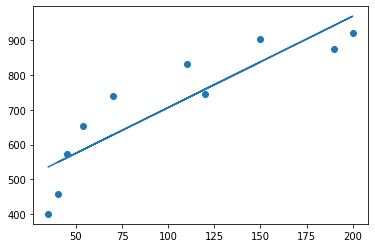

In [5]:
plt.scatter(zp, ks)
plt.plot(zp, a + b*zp)
plt.show()

$$ \hat{\beta} = (X^T * X)^{-1} * X^T * Y $$

In [6]:
X = zp.reshape((10, 1))

In [7]:
b_ = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@ks)
b_

array([5.88982042])

График линейной регрессии без intercept

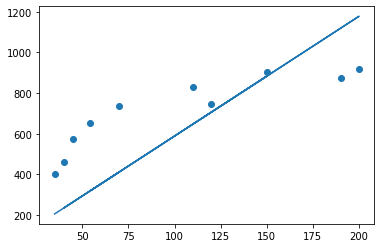

In [8]:
plt.scatter(zp, ks)
plt.plot(zp, b_*zp)
plt.show()

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Построим график функции потерь mse для линейной регрессии без intercept

In [9]:
def mse_(A, B, X, y):
    return np.mean(((A + B*X) - y)**2)

A = 0
B = np.linspace(4, 8, num=100)
y = np.array([mse_(A, i, zp, ks) for i in B])

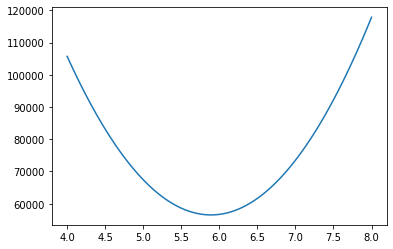

In [10]:
plt.plot(B, y)

Как видно из графика, минимум функции находится в окрестностях 5.7-6.0

In [11]:
B1 = 0.1
A1 = 0
alpha = 1e-6

for i in range(1001):
    # производная функции mse по B1
    B1 -= alpha*(2/n)*np.sum(((A1 + B1*zp) - ks)*zp)
    if i%10 == 0:
        print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(A1, B1, zp, ks)}')

Iteration: 0, B1 = 0.25952808, mse = 493237.7212546963
Iteration: 10, B1 = 1.6319792141937546, mse = 306275.7568040035
Iteration: 20, B1 = 2.6698789606516935, mse = 199352.96411174876
Iteration: 30, B1 = 3.4547782236263824, mse = 138204.25062502263
Iteration: 40, B1 = 4.04834889855975, mse = 103233.54824312925
Iteration: 50, B1 = 4.497229618367758, mse = 83233.94472982832
Iteration: 60, B1 = 4.836690291080364, mse = 71796.25222021657
Iteration: 70, B1 = 5.093403362579137, mse = 65255.0820486468
Iteration: 80, B1 = 5.287539550879594, mse = 61514.21323463749
Iteration: 90, B1 = 5.434352720103083, mse = 59374.825462025976
Iteration: 100, B1 = 5.54537842245223, mse = 58151.31823171113
Iteration: 110, B1 = 5.629340281237233, mse = 57451.59938606899
Iteration: 120, B1 = 5.692835432193034, mse = 57051.433003054815
Iteration: 130, B1 = 5.740852880272922, mse = 56822.57946410561
Iteration: 140, B1 = 5.777165500770666, mse = 56691.69904907657
Iteration: 150, B1 = 5.804626485478126, mse = 56616.8

Построим график линейной регрессии используя полученный коэффициент b

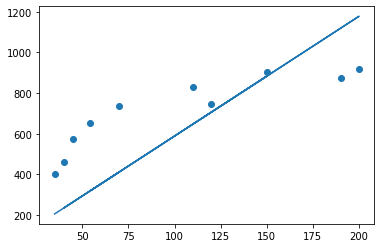

In [12]:
plt.scatter(zp, ks)
plt.plot(zp, A1 + B1*zp)

### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица значений функции Лапласа используется в том случае, когда известно Среднее Квадратичное Отклонение ($\sigma$) генеральной совокупности

Таблица критических точек распределения Стьюдента используется, когда Среднее Квадратичное Отклонение генеральной совокупности неизвестно

### *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [13]:
A1 = 0.1
B1 = 0.1
alpha = 1e-6

for i in range(5001):
    # производная функции mse по A1
    A1 -= (2/n)*np.sum(((A1 + B1*zp) - ks))
    # производная функции mse по B1
    B1 -= alpha*(2/n)*np.sum(((A1 + B1*zp) - ks)*zp)
    if i%100 == 0:
        print(f'Iteration: {i}, A1 = {A1}, B1 = {B1}, mse = {mse_(A1, B1, zp, ks)}')

Iteration: 0, A1 = 1399.4199999999996, B1 = -0.024274295999999917, mse = 502965.05055066757
Iteration: 100, A1 = 659.2883484501257, B1 = 1.3445288654242766, mse = 19508.92389287026
Iteration: 200, A1 = 518.3649563438468, B1 = 1.9956191351162624, mse = 7952.245747288075
Iteration: 300, A1 = 476.75775757246015, B1 = 2.3133083060964035, mse = 6802.312418365099
Iteration: 400, A1 = 459.7261675357779, B1 = 2.4693471912381546, mse = 6550.345435605492
Iteration: 500, A1 = 451.77077488729424, B1 = 2.5461173881733754, mse = 6489.771686655753
Iteration: 600, A1 = 447.90783444468525, B1 = 2.5839039109230084, mse = 6475.10467758887
Iteration: 700, A1 = 446.0128331395366, B1 = 2.6025045467049117, mse = 6471.5508344899645
Iteration: 800, A1 = 445.080796922073, B1 = 2.611661065928325, mse = 6470.6896438401345
Iteration: 900, A1 = 444.622082323593, B1 = 2.6161685687106995, mse = 6470.480950029987
Iteration: 1000, A1 = 444.3962819217221, B1 = 2.618387492289299, mse = 6470.4303766444955
Iteration: 1100,

График линейной регрессии с intercept

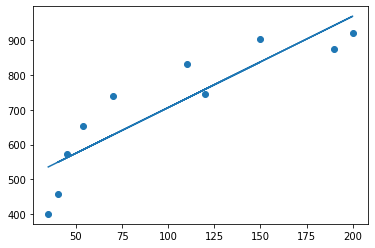

In [14]:
plt.scatter(zp, ks)
plt.plot(zp, A1 + B1*zp)